# Programming for Data Analytics Final Project: Wind

### Author: Aoife Flavin

Put a description of what the project is for here



Description of the dataset

In [21]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


I began by loading in the dataset and taking a look at the first few rows of data.

In [36]:
df = pd.read_csv(
    'sherkin_island_weather.csv', skiprows=17, dtype=str, low_memory=False)

print(df.columns)
#https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


I then renamed the columns

In [41]:
df.columns = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)"
]
df = df.iloc[:, :15]  # keep first 15 columns
new_column_names = df.columns


#https://www.datacamp.com/tutorial/loc-vs-iloc

In [42]:
numeric_columns = [
    "Precipitation Amount (mm)",
    "Air Temperature (C)",
    "Wet Bulb Temperature (C)",
    "Dew Point Temperature (C)",
    "Vapour Pressure (hPa)",
    "Relative Humidity (%)",
    "Mean Sea Level Pressure (hPa)",
    "Mean Wind Speed (knot)",
    "Predominant Wind Direction (degree)"
]

# convert to float 
for col in numeric_columns:
    if col in df.columns:  
        df[col] = pd.to_numeric(df[col], errors="coerce")  # convert invalid columns to Nan

In [ ]:
# date time formatting
df["Date and Time (UTC)"] = pd.to_datetime(
    df["Date and Time (UTC)"], 
    format="%d-%b-%Y %H:%M",  
    errors="coerce"  
)

# get rid of rows with invalid dates
df.dropna(subset=["Date and Time (UTC)"], inplace=True)

#https://www.w3schools.com/python/pandas/pandas_cleaning_wrong_format.asp

Clean the data

In [52]:
df.dropna(how="all", inplace=True)


#https://www.w3schools.com/python/pandas/ref_df_dropna.asp

Plots I could do:
- Summary Statistics: Compute mean, median, variance, and standard deviation for each weather variable (e.g., temperature, humidity, wind speed).
- Seasonal Patterns: Plot time series to observe daily or seasonal trends.
- Windspeed over a single day / week / year
- Max windspeed over time
- Heatwaves/Cold Spells: Detect extended periods of high or low temperatures.
- Storm Events: Identify periods with unusually high wind speeds or rainfall
- Heatmaps: Use heatmaps for hourly or daily patterns (e.g., temperature across the hours of the day over a month).
- Variable Interdependence: Explore how variables like temperature, humidity, and wind speed correlate.
- Trend Analysis: Identify long-term trends in temperature, precipitation, or wind speed over the period of data collection.
- Machine Learning Models: Use regression or classification models to predict specific outcomes, like rainfall.

In [51]:
#Find out what data types each variable is
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180480 entries, 0 to 180479
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Date and Time (UTC)                  180480 non-null  datetime64[ns]
 1   Indicator 1                          180480 non-null  object        
 2   Precipitation Amount (mm)            180076 non-null  float64       
 3   Indicator 2                          180480 non-null  object        
 4   Air Temperature (C)                  180084 non-null  float64       
 5   Indicator 3                          180480 non-null  object        
 6   Wet Bulb Temperature (C)             180025 non-null  float64       
 7   Dew Point Temperature (C)            180025 non-null  float64       
 8   Vapour Pressure (hPa)                180025 non-null  float64       
 9   Relative Humidity (%)                180027 non-null  float64       
 

In [53]:
# Filter data for winter (Nov-Jan) and summer (May-Jul)
winter_months = [11, 12, 1]
summer_months = [5, 6, 7]

# Just the month
df["Month"] = df["Date and Time (UTC)"].dt.month

# filter winter and summer data
winter_data = df[df["Month"].isin(winter_months)]
summer_data = df[df["Month"].isin(summer_months)]

# create function for summary stats
def compute_summary_statistics(data, variable_name):
    stats = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Variance": np.var(data),
        "Standard Deviation": np.std(data)
    }
    return stats

# calculate winter stats
winter_stats = {
    "Temperature (C)": compute_summary_statistics(winter_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(winter_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(winter_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# calculate summer stats
summer_stats = {
    "Temperature (C)": compute_summary_statistics(summer_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(summer_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(summer_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# Display results
print("Winter Summary Statistics:")
for variable, stats in winter_stats.items():
    print(f"{variable}: {stats}")

print("\nSummer Summary Statistics:")
for variable, stats in summer_stats.items():
    print(f"{variable}: {stats}")

Winter Summary Statistics:
Temperature (C): {'Mean': 8.820644354081951, 'Median': nan, 'Variance': 7.786784588605971, 'Standard Deviation': 2.790481067594971}
Humidity (%): {'Mean': 83.7321983848236, 'Median': nan, 'Variance': 109.27413585521282, 'Standard Deviation': 10.453426990954345}
Wind Speed (knot): {'Mean': 14.490671850213374, 'Median': nan, 'Variance': 59.11297351246378, 'Standard Deviation': 7.68849618016838}

Summer Summary Statistics:
Temperature (C): {'Mean': 13.52548458436321, 'Median': nan, 'Variance': 6.622054234844865, 'Standard Deviation': 2.5733352356125048}
Humidity (%): {'Mean': 84.55056155413902, 'Median': nan, 'Variance': 111.13456897913213, 'Standard Deviation': 10.542038179552003}
Wind Speed (knot): {'Mean': 10.61000043367015, 'Median': nan, 'Variance': 28.613067951776912, 'Standard Deviation': 5.349118427533355}


Sources:
1. https://www.geeksforgeeks.org/get-month-from-date-in-pandas-python/
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
3. https://www.geeksforgeeks.org/compute-the-mean-standard-deviation-and-variance-of-a-given-numpy-array/


Checked what is the most up to date data in the dataset: This data ends at the end of November 2024

Create a plot of windspeed over a single day. (I chose the 19th of November because that is my birthday)

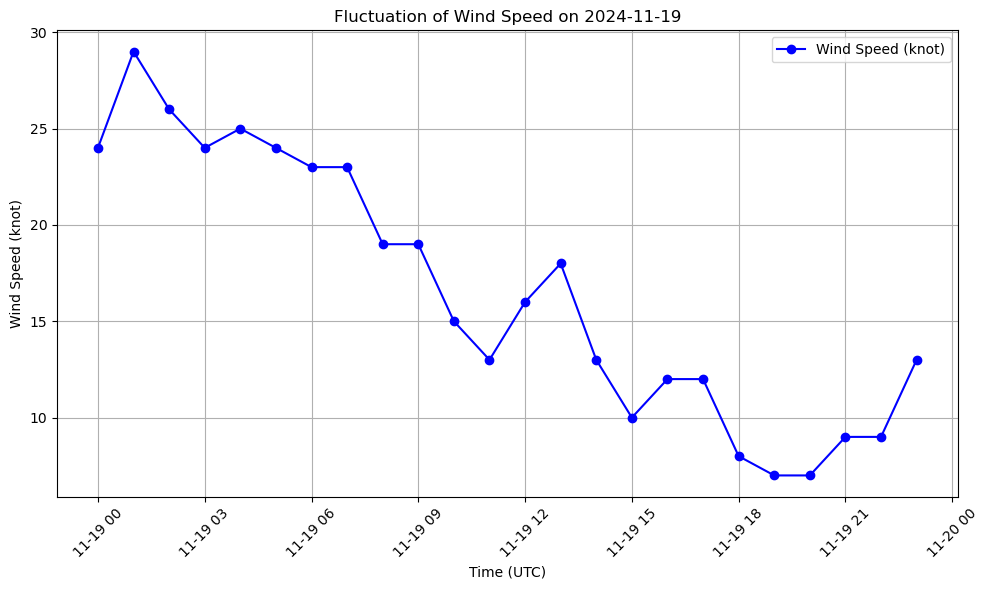

In [54]:
# Filter data for the specific date (19th November 2024)
specific_date = "2024-11-19"
filtered_data = df[df["Date and Time (UTC)"].dt.date == pd.to_datetime(specific_date).date()]

# Plot Wind Speed over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date and Time (UTC)"], filtered_data["Mean Wind Speed (knot)"], marker='o', color='blue', label="Wind Speed (knot)")
plt.xlabel("Time (UTC)")
plt.ylabel("Wind Speed (knot)")
plt.title(f"Fluctuation of Wind Speed on {specific_date}")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

I then created a plot of the windspeed over a week, using the week with the most recent data.

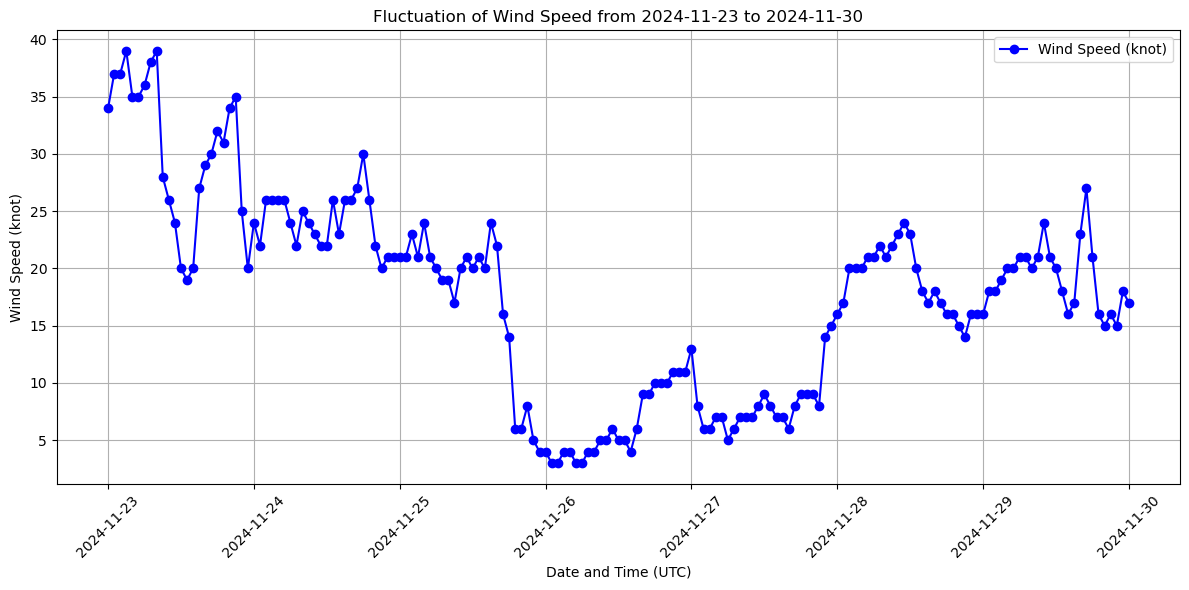

In [55]:
# date range
start_date = "2024-11-23"
end_date = "2024-11-30"

# Filter data
filtered_data = df[(df["Date and Time (UTC)"] >= pd.to_datetime(start_date)) & 
                   (df["Date and Time (UTC)"] <= pd.to_datetime(end_date))]

# Plot Wind Speed over week
plt.figure(figsize=(12, 6))
plt.plot(filtered_data["Date and Time (UTC)"], filtered_data["Mean Wind Speed (knot)"], marker='o', color='blue', label="Wind Speed (knot)")
plt.xlabel("Date and Time (UTC)")
plt.ylabel("Wind Speed (knot)")
plt.title(f"Fluctuation of Wind Speed from {start_date} to {end_date}")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [71]:
print(df.columns)

Index(['Indicator 1', 'Precipitation Amount (mm)', 'Indicator 2',
       'Air Temperature (C)', 'Indicator 3', 'Wet Bulb Temperature (C)',
       'Dew Point Temperature (C)', 'Vapour Pressure (hPa)',
       'Relative Humidity (%)', 'Mean Sea Level Pressure (hPa)', 'Indicator 4',
       'Mean Wind Speed (knot)', 'Indicator 5',
       'Predominant Wind Direction (degree)', 'Month', 'Date'],
      dtype='object')


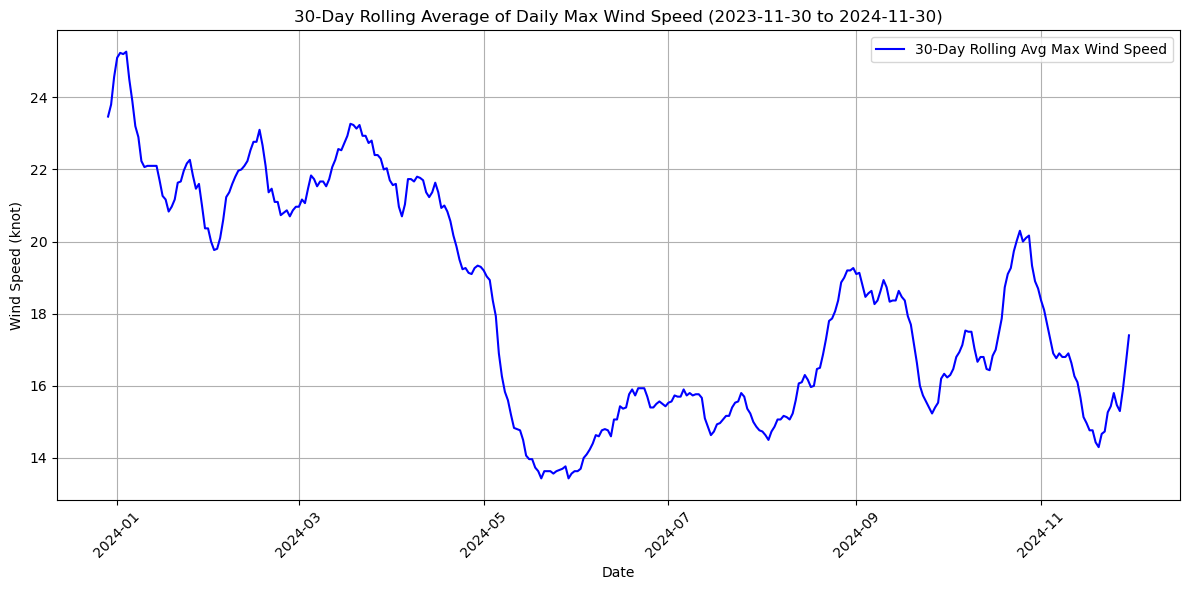

In [76]:
# Define date range
start_date = pd.to_datetime("2023-11-30").date()
end_date = pd.to_datetime("2024-11-30").date()

# filter using date column
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Get daily max wind speed
daily_max_wind = filtered_df.groupby("Date")["Mean Wind Speed (knot)"].max().reset_index()
daily_max_wind.rename(columns={"Mean Wind Speed (knot)": "Daily Max Wind Speed (knot)"}, inplace=True)

#Calculate 30 day rolling average 
daily_max_wind["Rolling Avg Max Wind Speed (knot)"] = daily_max_wind["Daily Max Wind Speed (knot)"].rolling(window=30).mean()

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wind["Date"], daily_max_wind["Rolling Avg Max Wind Speed (knot)"], color='blue', label="30-Day Rolling Avg Max Wind Speed")
plt.xlabel("Date")
plt.ylabel("Wind Speed (knot)")
plt.title(f"30 Day Rolling Average of Daily Max Wind Speed ({start_date} to {end_date})")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#https://robotwealth.com/rolling-and-expanding-windows-for-dummies/
#https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
#https://sparkbyexamples.com/pandas/pandas-filter-dataframe-rows-on-dates/
